In [99]:
from __future__ import print_function, absolute_import

try:
  %tensorflow_version 2.x
except Exception:
  pass

import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
np.random.seed(1234)

print(tf.__version__)

2.1.0-rc1


In [0]:
from keras.utils import np_utils
from keras import backend as k

In [0]:
mnist = keras.datasets.mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
import matplotlib.pyplot as plt

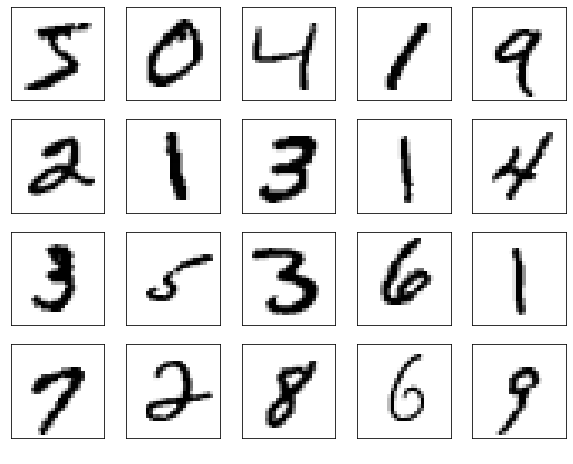

In [125]:
plt.figure(figsize=(10,10))
for j in range(20):
  plt.subplot(5,5,j+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[j], cmap=plt.cm.binary)
  plt.xlabel(y_train[j], color = 'white', fontsize=15)
plt.show()

In [105]:
print('train mnist data set:',X_train.shape)
print('test mnist data set:',X_test.shape)

train mnist data set: (60000, 28, 28)
test mnist data set: (10000, 28, 28)


In [130]:
# preprocess data
# reshaping into 28,28,1
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

print('train mnist data set after reshape:',X_train.shape)
print('test mnist data set after reshape:',X_test.shape)

print('max value:',np.max(X_train))
print('min value:', np.min(X_train))


train mnist data set after reshape: (60000, 28, 28, 1)
test mnist data set after reshape: (10000, 28, 28, 1)
max value: 255.0
min value: 0.0


In [0]:
# preproces
#X_train = X_train / 255.0
#X_test = X_test / 255.0

#print('max value after:',np.max(X_train))
#print('min value after:', np.min(X_train))

In [0]:
# z score normalization
X_train = X_train.astype('float32')
X_train = X_train.astype('float32')

print('train images shape after reshape:', X_train.shape)
print('test images shape after reshape:', X_test.shape)
# Z-Score nomalization
# defining a function
def z_norm(data):
  data = data - np.mean(data) / data.std()
  return data

z_norm(X_train)
z_norm(X_test)

In [128]:
# a function to convert y to categorical
def to_categorical(y):
  y = np_utils.to_categorical(y)
  num_classes = y.shape[1]
  return num_classes

to_categorical(y_train)
to_categorical(y_test)

10

In [0]:
# defining the model
model = tf.keras.Sequential([
         tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), input_shape=(28,28,1), activation='relu'),
         tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
         tf.keras.layers.Dropout(0.3),
         tf.keras.layers.Flatten(),
         tf.keras.layers.Dense(240, activation='relu'),
         tf.keras.layers.Dense(10, activation='softmax')           
])

In [133]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 240)               1106160   
_________________________________________________________________
dense_13 (Dense)             (None, 10)                2410      
Total params: 1,109,402
Trainable params: 1,109,402
Non-trainable params: 0
____________________________________________

In [0]:
model.compile(optimizer='adagrad', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit(x=X_train, y=y_train, verbose=0, epochs=5, batch_size=100)

In [140]:
history.history

{'accuracy': [0.9399667, 0.9432333, 0.9468333, 0.94915, 0.9518],
 'loss': [0.32989506939115626,
  0.2984774397375683,
  0.26631692913516114,
  0.2445731256281336,
  0.22517630482790993]}

In [141]:
model.evaluate(X_test, y_test, verbose=0)

[0.109152764561004, 0.9739]